# Henke [2012]

In [362]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [363]:
import sympy as sym
import numpy as np
import matplotlib.pyplot as plt
from sympy import Function, Symbol, Eq, solve, dsolve, Derivative, Matrix, Transpose, separatevars
from sympy import *
from sympy.vector import *
from IPython.display import Math, Latex

## Introduction

Basic idea:
- Design of a smart material structure that can adapt to different loading conditions;
- use in lightweight constructions;
- here, smart means control/change of the stiffness of the structure;
- stiffness consits of two things: Material properties (e.g. Young's modulus) and part geometry (e.g. second moment of area)
- one way to do so is to usw shape memory polymers (SMPs), they change their Young's modulus due to heat
- change of second moment of area needs sophisticated mechanical designs
- the stiffness od layered structures can be changed by controlling the normal force between the layer and therfeore, the frictional force as well
- Henke et al. chose a multi-layer, stacked beam structure consisting of EAPs

## Theoretical background

Definition of variables:
- $k$ as stiffness of a one-sided clamped beam with froce at its free end [N/m]
- $F$ as force [N]
- $u$ as displacement at the free end of the beam [m]
- $E$ as Young's modulus [N/m$^2$]
- $J$ as second moment of area [m$^4$]
- $l$ as length of the beam [m]
- $b$ as width of the beam [m]
- $h$ as height of the beam [m]
- $h_0$ as height of one layer of the beam [m]
- $N$ as number of Layers [-]

![Sketch](sketch.png)



### Equation (1)

Where does this equation come from? 
- Euler-Bernoulli beam theory
- assumption probably small deflection, because for large deflections this will be different
- compare Steigenberger [2012]

In [364]:
x, z, E, J, F, l, k, b, h, h0, N = sym.symbols('x, z, E, J, F, l, k, b, h, h0, N',real = 'True')
M = Function('M')
u = Function('u')

In [365]:
eq1 = Eq(M(x), -F*(l-x))
eq2 = Eq(diff(u(x),x,x),M(x)/(E*J))

display(eq1, eq2)

Eq(M(x), -F*(l - x))

Eq(Derivative(u(x), (x, 2)), M(x)/(E*J))

In [366]:
sol = solve(eq1,M(x))
sol[0]

F*(-l + x)

In [367]:
dsol = dsolve(eq2.subs(M(x),sol[0]), ics={u(0):0, diff(u(x),x).subs(x,0):0})
dsol

Eq(u(x), x*(-F*l*x/2 + F*x**2/6)/(E*J))

In [368]:
EQ1 = Eq(k, -F/dsol.rhs.subs(x,l))
display(EQ1)

Eq(k, 3*E*J/l**3)

### Equation (2)
- "Text book" equation
- change with respect to the vertical direction / height of the beam
- consequently, $dA = z * b$ whereby b is constant
- integration takes places from $-\frac{h}{2}$ to $+\frac{h}{2}$

In [369]:
J = integrate(b*z**2,(z,-h/2,h/2))
display(J)

b*h**3/12

### Equations (3) & (4) & (5)

- exemplarily, a structure with four layers $N=4$ of thickness $h_0$ considering $4 \cdot h_0 = h$
- $J_a$ with independent layers / no connection
- $J_b$ with joined layers

![Sketch](sketch2.png)

- for (a)  Steiner's theorem must be used
- $J_a = J_1 + J_2 + J_3 + J_4$
- $J_1 = J_{10} + J_{1S}$
- $J_{10} = \frac{b \cdot h_0^3}{12}$
- $J_{1S} = z^2 \cdot A$ 

In [370]:
J1 = integrate(b*z**2,(z,-h0/2,h0/2)) + h0*b * (3/2*h0-0)
J2 = integrate(b*z**2,(z,-h0/2,h0/2)) + h0*b * (1/2*h0-0)
J3 = integrate(b*z**2,(z,-h0/2,h0/2)) + h0*b * (-1/2*h0-0)
J4 = integrate(b*z**2,(z,-h0/2,h0/2)) + h0*b * (-3/2*h0-0)
Ja = J1 + J2 + J3 + J4

Jb = integrate(b*z**2,(z,-4*h0/2,4*h0/2))

eq5 = Eq(Jb/Ja,N**2)
display(Ja, Jb, eq5)

b*h0**3/3

16*b*h0**3/3

Eq(16, N**2)

- the number of layers scales the stiffness with a power of 2

## Design concepts

- the Young's modulus of the actuator should have the same order of magnitude as the layers
- EAPs are able to perform large displacements, especially when they are pre-strechted
- silicone based elastomers with electrodes made of thin silver layers (80 nm)
- the electrodes are compliant only in one direction
- silicone is an hyper-elastic material, here the Moony-Rivlin material model is used
- this model is based on strain energy $W$ calculated from the invariants of $I_1$ and $I_2$ of the left Cauchy-Green deformation tensor

![Sketch](sketch3.png)

### Equations (6) & (7) & (8)

- $I_1$ & $I_2$ as invariants
- $\lambda_1$, $\lambda_2$, $\lambda_3$ as strech ratios
- $C_{10}$ & $C_{01}$ as constants
- $W$ as strain energy
- $\sigma$ as stress
- $p$ as hydrostatic pressure
- $d_0$ as initial thickness of the EAP
- $w_0$ as initial width of the EAP
- $\epsilon_0$ as absolute permittivity
- $\epsilon_r$ as relative permittivity
- $V$ as volatge
- $K$ as number of layers of the actuator

In [371]:
lambda1, lambda2, lambda3, C10, C01, p, d0, w0, epsilon0, epsilon_r, V, K, I1, I2 = sym.symbols('lambda1, lambda2, lambda3, C10, C01, p, d0, w0, epsilon0, epsilon_r, V, K, I1, I2',real = 'True')

Invariants:

In [372]:
I1 = lambda1**2 + lambda2**2 + lambda3**2
I2 = lambda1**(-2) + lambda2**(-2) + lambda3**(-2)

display(Math(r'$I_1 = {}$'.format(sym.latex(I1))))
display(Math(r'$I_2 = {}$'.format(sym.latex(I2))))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

Constitutive Model: Mooney-Rivlin

In [373]:
W = C10 * (I1 - 3) + C01 * (I2 - 3)
display(Math(r'$W = {}$'.format(sym.latex(W))))

<IPython.core.display.Math object>

### Equation (10)
Principal Cauchy stress for an incompressible hyperelastic material with external load and electro-mechanical pressure

In [374]:
sigma1 = diff(W,lambda1) - p

display(Math(r'$\sigma_1 = {}$'.format(sym.latex(sigma1))))

<IPython.core.display.Math object>

From the paper:

In [375]:
sym.expand(2*(C10 + C01)*(lambda1**2-1/lambda1**2)-p)

2*C01*lambda1**2 - 2*C01/lambda1**2 + 2*C10*lambda1**2 - 2*C10/lambda1**2 - p

Looking for the source of this equation in the present form: "Modeling and experimental verification of a dielectric polymer energy scavenging cycle" source [16] and not as mentioned [18]. This a "subsidiary" cite. Finally, in [16] we found equation (9) which is the basis of equation (10) of the present work:

In [376]:
eq10 = Eq(K*2*(C10 + C01)*(lambda1**2-1/lambda1**2) - epsilon0*epsilon_r*V**2*lambda1**2/d0**2, F*lambda1/(w0*d0))
#eq10 = Eq(K*2*(C10 + C01/lambda1)*(lambda1**2-1/lambda1) - epsilon0*epsilon_r*V**2*lambda1**2/d0**2, F*lambda1/(w0*d0))

display(eq10)

Eq(2*K*(C01 + C10)*(lambda1**2 - 1/lambda1**2) - V**2*epsilon0*epsilon_r*lambda1**2/d0**2, F*lambda1/(d0*w0))

This equation is derived by putting in some comprehensive knowledge and cannot be found "from one to antother line". Furthermore, the following connection must be know to used it for further calculations, see [16] equation (2):

In [377]:
lambda11 = 1 + x
display(Math(r'$\lambda_1 = {}$'.format(sym.latex(lambda11))))

<IPython.core.display.Math object>

## Actuator design

![Sketch](sketch4.png)
This figures seems to be qualitatively. Since there are no parameters for the structure at all.

![Sketch](sketch5.png)
Sketch of the structure.

![Sketch](sketch6.png)
Rigid body model of the structure.

In [378]:
u1, u2, F1, F2, alhpa, beta = sym.symbols('u1, u2, F1, F2, alhpa, beta',real = 'True')
u1, u2, F1, F2, alhpa, beta = sym.symbols('u1, u2, F1, F2, alhpa, beta',real = 'True')


### Equation (11)

$\beta = \tan(\alpha) = \frac{u_1}{u_2} = \frac{F_2}{F_1}$

![Sketch](sketch7.png)
Checking our equation in comparison to this figure.

In [379]:
eq10 = eq10.subs(lambda1,lambda11)

In [380]:
display(eq10)

Eq(2*K*(C01 + C10)*((x + 1)**2 - 1/(x + 1)**2) - V**2*epsilon0*epsilon_r*(x + 1)**2/d0**2, F*(x + 1)/(d0*w0))

In [381]:
sol = solve(eq10,F)
F = sol[0]
display(Math(r'$F = {}$'.format(sym.latex(F))))

<IPython.core.display.Math object>

Parameters in SI units:

In [382]:
val_w0 = 80*1E-3
val_d0 = 20*1E-6
val_V = 2500
val_C10 = 0.07*1E6 * 1E6
val_C01 = 0.04*1E6 * 1E6
val_epsilon_r = 3.2
val_epsilon0 = 8.85*1E-12
val_K = 2

F = F.subs([(w0,val_w0), (d0,val_d0), (V,val_V), (C10, val_C10), (C01, val_C01), (epsilon_r, val_epsilon_r), (epsilon0, val_epsilon0), (K, val_K)])
F

4000.0*(-0.000177*(x + 1)**4 + 1.6e-9*(x + 1)**3*(110000000000.0*x + 110000000000.0) - 176.0)/(x + 1)**3

In [383]:
F_fun = lambdify(x,F,'numpy')
#x_vals = np.arange(0,4.1*1E-3,0.1*1E-3)
x_vals = np.arange(0,0.06,0.001)
F_vals = F_fun(x_vals)

display(F_vals)

array([-7.08000000e-01,  2.81107432e+03,  5.61445074e+03,  8.40946310e+03,
        1.11961530e+04,  1.39745619e+04,  1.67447308e+04,  1.95067007e+04,
        2.22605120e+04,  2.50062054e+04,  2.77438208e+04,  3.04733982e+04,
        3.31949773e+04,  3.59085975e+04,  3.86142980e+04,  4.13121178e+04,
        4.40020956e+04,  4.66842700e+04,  4.93586793e+04,  5.20253614e+04,
        5.46843543e+04,  5.73356956e+04,  5.99794226e+04,  6.26155726e+04,
        6.52441825e+04,  6.78652890e+04,  7.04789287e+04,  7.30851379e+04,
        7.56839528e+04,  7.82754091e+04,  8.08595426e+04,  8.34363887e+04,
        8.60059828e+04,  8.85683599e+04,  9.11235549e+04,  9.36716024e+04,
        9.62125369e+04,  9.87463927e+04,  1.01273204e+05,  1.03793004e+05,
        1.06305827e+05,  1.08811707e+05,  1.11310676e+05,  1.13802768e+05,
        1.16288015e+05,  1.18766451e+05,  1.21238108e+05,  1.23703017e+05,
        1.26161213e+05,  1.28612725e+05,  1.31057587e+05,  1.33495830e+05,
        1.35927485e+05,  

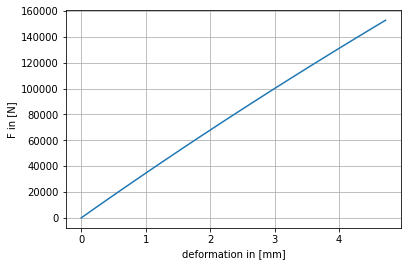

In [384]:
plt.plot(x_vals*80,F_vals)
plt.ylabel('F in [N]')
plt.xlabel('deformation in [mm]')
plt.grid()